In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./Fish.csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])
print(le.classes_)
print(df.head())

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
   Species  Weight  Length1  Length2  Length3   Height   Width
0        0   242.0     23.2     25.4     30.0  11.5200  4.0200
1        0   290.0     24.0     26.3     31.2  12.4800  4.3056
2        0   340.0     23.9     26.5     31.1  12.3778  4.6961
3        0   363.0     26.3     29.0     33.5  12.7300  4.4555
4        0   430.0     26.5     29.0     34.0  12.4440  5.1340


In [5]:
X = df.iloc[:, [0, 2, 3, 4, 5, 6]].to_numpy()
Y = df.iloc[:, 1].to_numpy()

In [6]:
def preprocess(X):
    mu = X.mean(axis = 0)
    sigma = X.std(axis = 0)
    X = (X-mu)/sigma
    
    ones = np.ones((X.shape[0], 1))
    X_ = np.append(ones, X, axis = 1)
    return X_

In [7]:
X = preprocess(X)

In [8]:
Y = Y.reshape((-1,1))

In [9]:
print(X.shape, Y.shape)

(159, 7) (159, 1)


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle = True, test_size = 0.2)

In [12]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(127, 7) (32, 7) (127, 1) (32, 1)


In [13]:
def hypothesis(X, theta):
    return X.dot(theta)

def mse(X, theta, Y):
    Y_ = hypothesis(X, theta)
    return ((Y_ - Y)**2).sum()/X.shape[0]

def gradient(X, theta, Y):
    Y_=  hypothesis(X, theta)
    return X.T.dot(Y_ - Y)/X.shape[0]

def gradient_descent(X, Y, lr = 0.04, epochs = 500):
    theta = np.zeros((X.shape[1], 1))
    loss = []
    for e in range(epochs):
        theta = theta - lr*gradient(X, theta, Y)
        loss.append(mse(X, theta, Y))
    return hypothesis(X, theta), loss

In [14]:
Y_train_pred, loss = gradient_descent(X_train, Y_train)

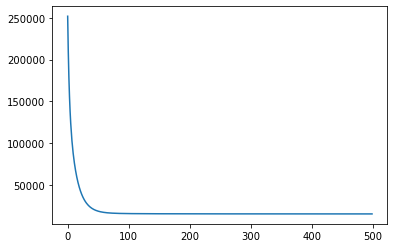

In [15]:
plt.plot(loss)
plt.show()

In [16]:
def r2Score(Y, Y_pred):
    num = ((Y - Y_pred)**2).sum()
    den = ((Y - Y.mean())**2).sum()
    return 1 - (num/den)

def adjusted_r2Score(Y, Y_pred, m, n):
    r2 = r2Score(Y, Y_pred)
    return 1 - ((1-r2)*(m-1)/(m-n-1))

In [17]:
m, n = X_train.shape
print(adjusted_r2Score(Y_train, Y_train_pred, m, n))
print(r2Score(Y_train, Y_train_pred))

0.8783734321078431
0.8851304636574074


In [18]:
#Using Closed Form Solution

theta = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T.dot(Y_train))
Y_p_train = X_train.dot(theta)
print(adjusted_r2Score(Y_train, Y_p_train, m, n))
print(r2Score(Y_train, Y_p_train))

0.8869908445496912
0.8932691309635973
